In [5]:
# This makes plots appear in the notebook
%matplotlib inline 

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 

import siamxt   

240


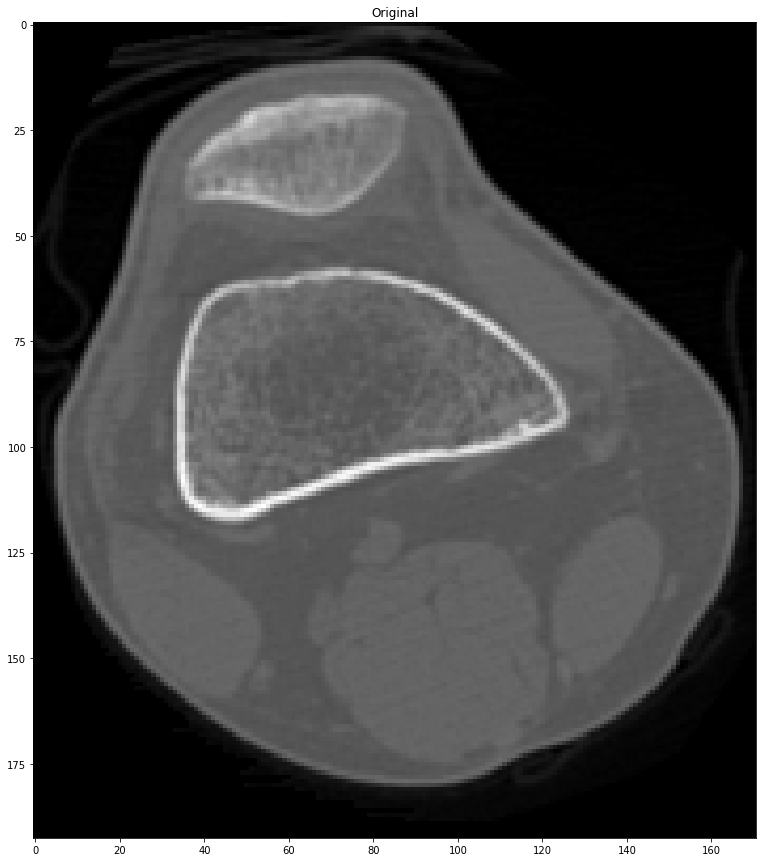

In [3]:
original_img = cv2.imread('../EP2/knee.pgm', cv2.IMREAD_GRAYSCALE)
print(original_img.max())
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()


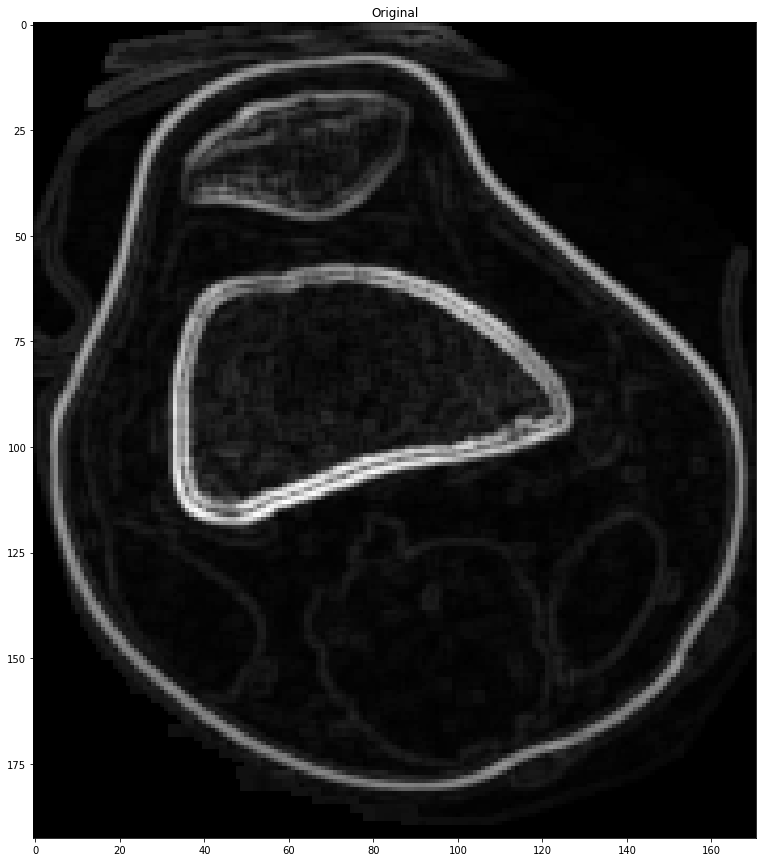

In [6]:

# TODO: MUDAR ELEMENTO ESTRUTRANTE PARA DISCO
gradient_img = ndimage.morphological_gradient(original_img, size=(3,3))

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(gradient_img, cmap='gray')
plt.title('Original')
plt.show()

Text(0.5,1,u'area extinction filter, n= 8 ')

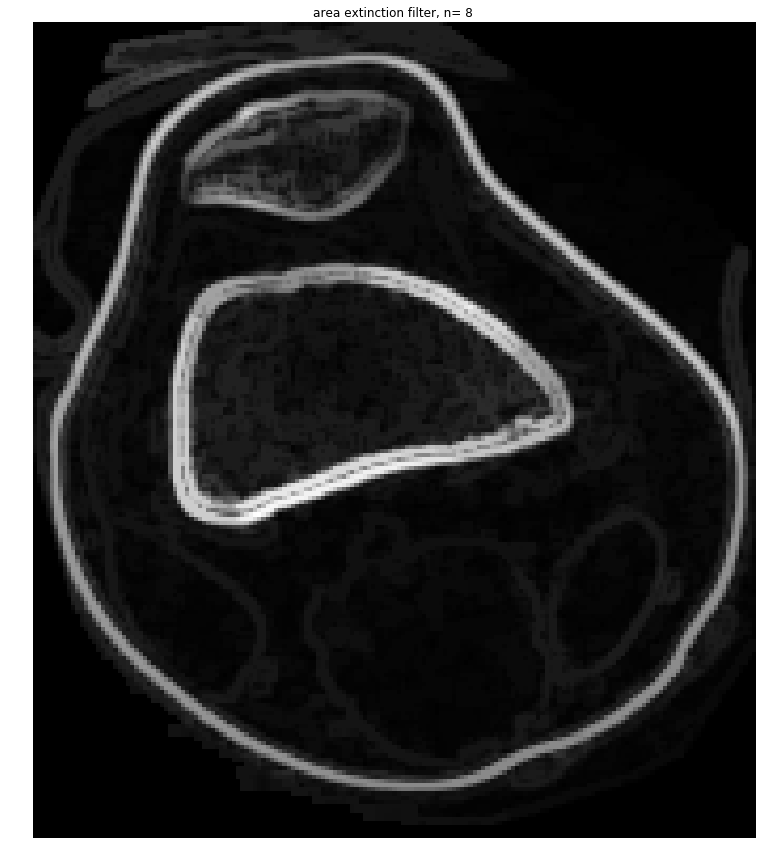

In [10]:
#Structuring element with connectivity-8
neighborhood = np.ones((3,3),dtype = bool)

# Number of leaves to be preserved
n = 8

mxt_gradient = siamxt.MaxTreeAlpha(gradient_img, neighborhood)


# TODO: trocar para volume
# Select the area attribute of the max-tree nodes from NA
area = mxt_gradient.node_array[3,:]

# Computes the area extinction values
area_ext = mxt_gradient.computeExtinctionValues(area,"volume")

# Applies the  area extinction filter
mxt_gradient.extinctionFilter(area_ext,n)

#Recovering the image 
img_gradient_filtered =  mxt_gradient.getImage()


#Displaying the filtered image
fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(img_gradient_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("area extinction filter, n= %d " %n)
